# Проект по принятию решений в бизнесе

**Описание проекта**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Загрузка данных и подготовка их к анализу

### Первичный анализ данных

Перед началом анализа импортируем все необходимые для работы библиотеки и загрузим заданные датафреймы

In [1]:
# импортируем библиотеки для работы с данными, графиками и математическими операторами
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
import datetime as dt

# уберем ограничение по количество отображаемых символом ячейки для удобства
pd.set_option('display.max_colwidth', None)

In [2]:
# загрузим заданные датафреймы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Выведем общую информацию, количество пропусков, описание и первые строчки представленной таблицы, а также возможное количество дубликатов.

In [3]:
# воспользуемся функцией автоматизиции вывода первичных данных по заданной таблице
def df_analysis(dataframe):
    """
    На вход функция принимает датафрейм.
    Выводит поэтапно на экран информацию по таблице методом info(),
    10 первых строчек методом head(), описание данных таблицы методом describe(), 
    а также выводит долю пропусков по столбцам с количеством дубликатов по всей таблице.
    """
    display(dataframe.info())
    display(dataframe.head(10))
    display(dataframe.describe())
    print(f'Доля пропусков в таблице {dataframe.isna().mean().apply("{:.2%}".format)}, количество дубликатов {dataframe.duplicated().sum()}')

In [4]:
# выведем первичную информацию по таблице hypothesis
df_analysis(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Доля пропусков в таблице Hypothesis    0.00%
Reach         0.00%
Impact        0.00%
Confidence    0.00%
Efforts       0.00%
dtype: object, количество дубликатов 0


In [5]:
# выведем первичную информацию по таблице orders
df_analysis(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Доля пропусков в таблице transactionId    0.00%
visitorId        0.00%
date             0.00%
revenue          0.00%
group            0.00%
dtype: object, количество дубликатов 0


In [6]:
# выведем первичную информацию по таблице visitors
df_analysis(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Доля пропусков в таблице date        0.00%
group       0.00%
visitors    0.00%
dtype: object, количество дубликатов 0


Согласно документации таблицы содержат следующие данные:

Таблица `hypothesis` (9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort):

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Таблица `orders` содержит информацию о заказах:

* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Таблица `visitors` содержит информацию о пользователях:

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**Вывод по первичному анализу**

В таблицах находятся данные о подготовленных гипотезах и о группах A/B тестирования.

В данных обнаржуены следующие проблемы:

* названия столбцов таблицы `hypothesis` написаны с заглавной буквы, необходимо привести к нижнему регистру;
* столбцы, содержащие в себе дату и время (`orders['date']`, `visitors['date']`), имеют строчный тип данных *object*. Необходимо привести к типу данных даты и времени *datetime*

Данных достаточно для анализа, необходимо устранить ошибки и перевести некоторые столбцы к нужному типу данных. Дубликаты и пропуски в данных отсутствуют.

### Подготовка данных к анализу

Проведем преобразование выявленных выше недостатков.

In [7]:
# название столбцов приведем к нижнему регистру
hypothesis.columns = map(str.lower, hypothesis.columns)

In [8]:
# преобразуем данные о времени
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

## Приоритизация гипотез

Перед началом A/B тестирования необходимо приоритизировать гипотезы фреймфорками ICE и RICE.

### Фреймворк ICE

Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [9]:
# рассчитаем ICE, применим сортировку по убыванию и выведем на экран гипотезы со значением ICE
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Фреймворк RICE

Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [10]:
# рассчитаем RICE, применим сортировку по убыванию и выведем на экран гипотезы со значением RICE
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод по приоретизации гипотез

По фреймворкам мы получили тройку приоритетных гипотез:
* **ICE** - гипотезы 8, 0 и 7
* **RICE** - гипотезы 7, 2 и 0

При применении фреймворка RICE приоритет изменился, т.к. в этом случае учитывается охват изменений. 

Для RICE на первое место вышла гипотеза № 7 "*Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*". Т.е. она охватывает все страницы продукта, когда для ICE первое место занмиает гипотеза №8 "*Запустить акцию, дающую скидку на товар в день рождения*". Соотвественно у этой гипотезы меньший охват, т.к. она учитывает только клиентов, у которых день рождения в заданный период.

Соответственно приоритетными для компании следует сделать гипотезы 7, 2 и 0.

## Анализ А/В теста

Перед изучением данных тестирования, проверим возможно попадание некоторых пользователей в обе группы тестирования:

In [11]:
# сгруппируем уникальных пользователей и проверим их попадание в две группы
group_counter = orders.groupby('visitorId')['group'].nunique()
ab_users = group_counter[group_counter > 1].index
print('\n Число пользователей, попавших в обе группы', len(ab_users))


 Число пользователей, попавших в обе группы 58


Проверим выборку групп пользователей, их количество и совершенные заказы. Также проверим статистическую значимость разницы размеров групп.
Для этого выделим нулевую `Н0` и альтернативную `Н1` гипотезы:

* `Н0` - разница в количестве посетителей в группах A и B статистически значима
* `Н1` - разницы в количестве посетителей в группах A и B нет

Уровень значимости примем 5% и для сравнения значимости вопользуемся критерием Манна-Уитни-Уилкоксона

In [12]:
# выведем на экран количество посетителей в группах
print('Количество посетителей в группе A {}'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Количество посетителей в группе B {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))
# выведем на экран количество покупок в группах
print('Количество покупок в группе A {}'.format(len(orders[orders['group']=='A'])))
print('Количество покупок в группе B {}'.format(len(orders[orders['group']=='B'])))


results = stats.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05
print('p-value:{:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('разница в количестве посетителей в группах A и B статистически значима')
else:
    print('разницы в количестве посетителей в группах A и B нет')

Количество посетителей в группе A 18736
Количество посетителей в группе B 18916
Количество покупок в группе A 557
Количество покупок в группе B 640
p-value:0.730
разницы в количестве посетителей в группах A и B нет


В группах тестирования присутствуют 58 пользователей, которые попали в обе группы. Данных посетителей **удалять не будем**, т.к. их малое количество и находятся они в таблице заказов `orders`, а из таблицы пользователей `visitors` выделить их по дате не представляется возможным.

Проверили выборку групп по количеству посетителей и заказов. Тест Манна-Уитни дал основание полагать, что **статистически значимой разницы в количестве посетителей в группах A и B нет**

### График кумулятивной выручки по группам

Соберём агрегированные кумулятивные по дням данные о заказах и посетителях интернет-магазина. На основании полученного датафрейма построим график кумулятивной выручки для обоих групп.

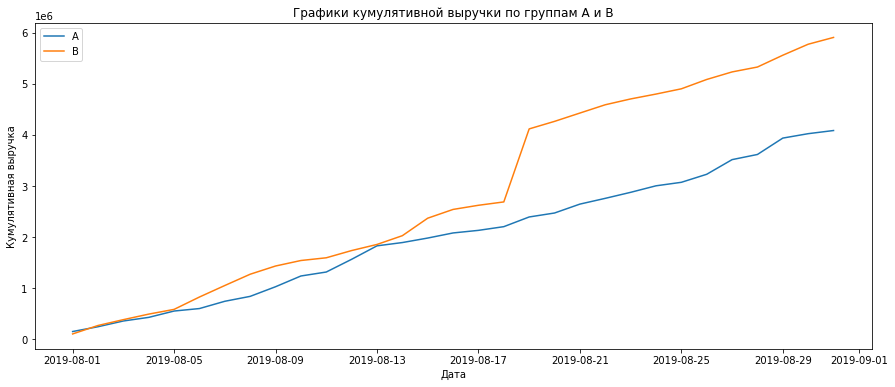

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(
    orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique',
     'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(
    visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и переименовываем столбцы
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# строим графики выручки группы, подписываем оси и указываем легенду
plt.figure(figsize=(15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам А и В')
plt.legend()
plt.show()

**Вывод**

На графике видно, что группа В лидирует по кумулятивной выручке на протяжении всего теста. Также на графике виден всплеск между 17 и 21 августа. Скорее всего это связано с аномальным "выбросом" - крупной покупкой пользователя из группы В.

### График кумулятивного среднего чека по группам

На основании агрегированных данных построим график кумулятивного среднего чека по группам.

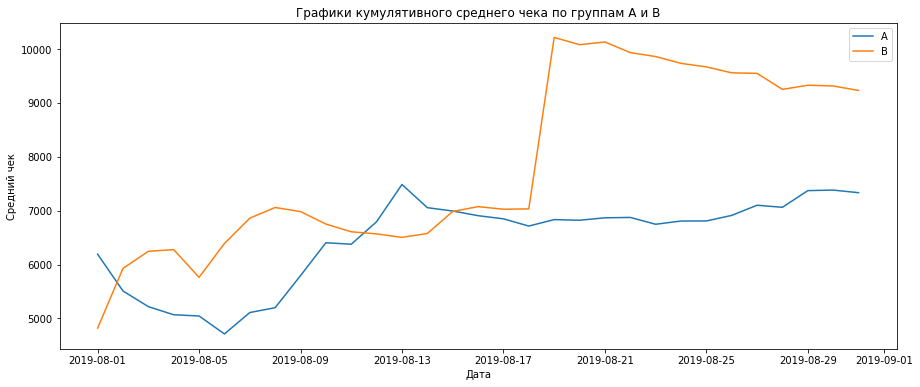

In [14]:
# построим графики среднего чека по группам, разделив кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Графики кумулятивного среднего чека по группам А и В')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show()

**Вывод**

Видно, что кумулятивный средний чек также выше в группе B и в том же временном диапазоне присутствует аномальный всплеск.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

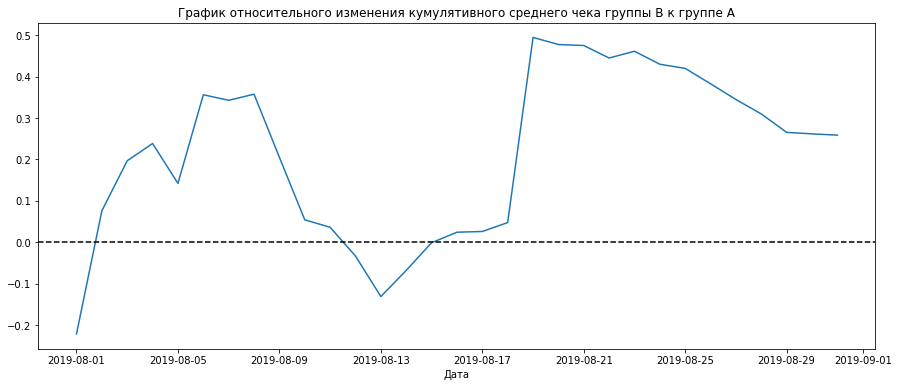

In [15]:
# собираем данные в одном датафрейме, объеденив их по дате
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков и задаем необходимые параметры
plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle = '--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()

**Вывод**

График показывает резкие колебания изменения среднего чека в отношении между группами. Скорее всего это связано с "выбросами" в покупках.

### График кумулятивной конверсии по группам

Построим график кумулятивной конверсии по группам.

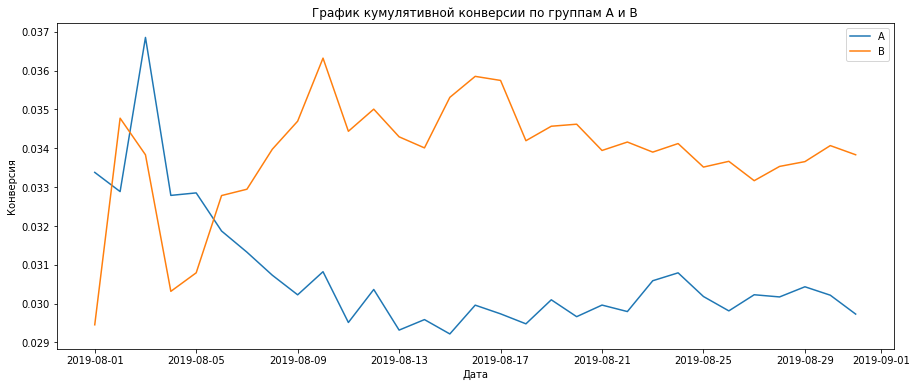

In [16]:
# считаем кумулятивную конверсию и фильтруем два отдельных датафреймя для групп А и В
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# на их основании строим графики
plt.figure(figsize=(15,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам A и B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

**Вывод**

В самом начале теста в группе А присутствует опережающий пик кумулятивной конверсии, но затем группа В стабильно лидирует весь временной промежуток.

### График относительного изменения кумулятивной конверсии группы B к группе A

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

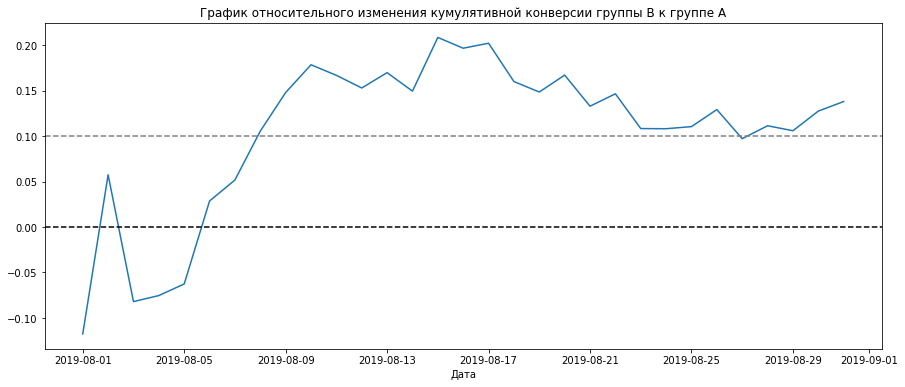

In [17]:
# собираем данные по кумулятьивным данным в одном датафрейме, объеденив их по дате
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение кумулятивной конверсии и задаем необходимые параметры графика
plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.show()

**Вывод**

Из графика видно, что кумулятивная конверсия группы В начинает опережать группу А примерно на 10% спустя 8 дней теста.

### Точечный график количества заказов по пользователям

Построим точечный график количества заказов по пользователям.

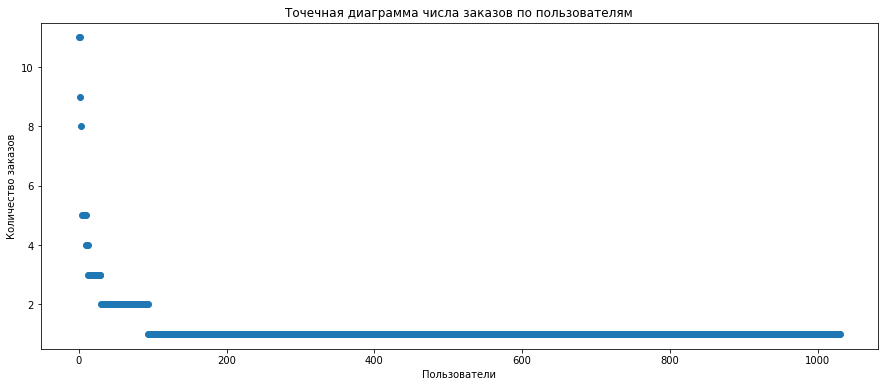

In [18]:
# сгруппируем заказы по пользователям и подсчитаем их количество
ordersByUsers = orders.groupby('visitorId', as_index = False).agg(
    {'transactionId':'nunique'}).sort_values(by='transactionId', ascending = False)
ordersByUsers.columns = ['visitorId', 'orders']

# на основании сгруппированных данных построим точечный график
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15,6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

**Вывод**

Большинство пользователей совершает не более 2 покупок, остальное можно считать выбросами.

### 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [19]:
user_percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('95-й перцентиль: {:.0f}\n99-й перцентиль: {:.0f}'.format(user_percentiles[0],user_percentiles[1]))

95-й перцентиль: 2
99-й перцентиль: 4


**Вывод**

Как и предполагалось из точечного графика по количеству заказов, не более 5% пользователей совершает более 2 покупок. Границей для определения аномальных пользователей будет количество покупок 2.

### Точечный график стоимостей заказов

Построим точечный график стоимостей заказов.

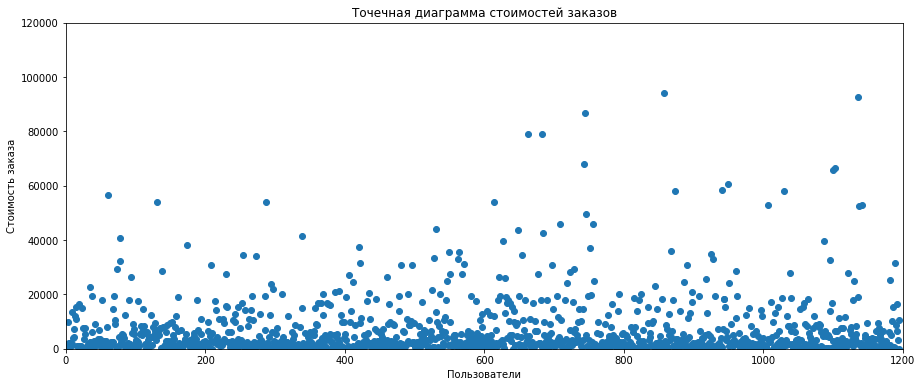

In [20]:
# на основании стоимостей заказов построим точечный график, задав для графика необходимые параметры осей
# и ограничим график стоимостью 120 000
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(15,6))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма стоимостей заказов')
plt.axis([0, 1200, 0, 120000])
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.show()

**Вывод**

Судя по графику можно предположить, что большинство пользователей делает покупку на сумму до 25 тыс. руб.

### 95-й и 99-й перцентили стоимости заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [21]:
revenue_percentiles = np.percentile(orders['revenue'], [95, 99])
print('95-й перцентиль: {:.0f}\n99-й перцентиль: {:.0f}'.format(revenue_percentiles[0],revenue_percentiles[1]))

95-й перцентиль: 28000
99-й перцентиль: 58233


**Вывод**

Как и примерно предполагалось из точечного графика по стоимости заказа, не более 5% пользователей совершает покупку свыше 28 тыс. руб. Границу для определения аномальных заказов будет стоимость выше 28000 руб.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Перед этим выделим нулевую `Н0` и альтернативную `Н1` гипотезы:

* `Н0` - по "сырым" данным в конверсии групп A и B разницы нет
* `Н1` - по "сырым" данным в конверсии групп A и B разница статистически значима.

**Уровень значимости здесь и далее примем 5% и для сравнения значимости будем пользоваться критерием Манна-Уитни-Уилкоксона**

In [22]:
# cоздадим переменные для пользователей из групп А и В, которые заказывали хотя бы 1 раз,
# рассчитаем число совершённых заказов и переименуем столбцы
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']

# разделим посещения по группам и датам
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# создадим переменные в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
    0,index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(
        ordersByUsersA['orders'])),name='orders',),],axis=0,)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0,index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(
        ordersByUsersB['orders'])),name='orders',),],axis=0,)

# рассчитаем прирост консервсии относительно групп, 
# проведем тест Манна-Уитни и выведем полученные результаты на экран
print('\nОтносительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('p-value: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "сырым" данным в конверсии групп A и B разница статистически значима')
else:
    print('По "сырым" данным в конверсии групп A и B разницы нет')


Относительный прирост конверсии группы B по отношению к группе A: 0.138
p-value: 0.017
По "сырым" данным в конверсии групп A и B разница статистически значима


**Вывод**

Тест Манна-Уитни-Уилкоксона дал основание полагать, что **по "сырым" данным в конверсии групп A и B разница статистически значима**. Прирост конверсии в группе В составил 14%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Выделим нулевую `Н0` и альтернативную `Н1` гипотезы:

* `Н0` - по "сырым" данным в среднем чеке заказа групп A и B разницы нет
* `Н1` - по "сырым" данным в среднем чеке заказа групп A и B разница статистически значима.

In [23]:
# рассчитаем прирост среднего чека относительно групп, 
# проведем тест Манна-Уитни и выведем полученные результаты на экран
print('Относительный прирост среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('p-value: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('по "сырым" данным в среднем чеке заказа групп A и B разница статистически значима.')
else:
    print('По "сырым" данным в среднем чеке заказа групп A и B разницы нет')

Относительный прирост среднего чека в группе B по отношению группы A: 0.259
p-value: 0.729
По "сырым" данным в среднем чеке заказа групп A и B разницы нет


**Вывод**

Тест Манна-Уитни-Уилкоксона дал основание полагать, что **по "сырым" данным в среднем чеке заказа групп A и B разницы нет**.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

При расчете перцентилей количества и суммы заказов мы выяснили, что 95% пользователей не делает более 2 заказов и сумма одной покупки в большинстве случаев не превышает 28 т.р. Для дальнейших тестов отфильтруем аномальных пользователей с превышающими данные лимиты значениями.

In [24]:
# выделим пользователей, которые сделали более 2 заказов
usersWithManyOrders = pd.concat([ordersByUsersA[
    ordersByUsersA['orders'] > 2]['visitorId'],ordersByUsersB[
    ordersByUsersB['orders'] > 2]['visitorId'],],axis=0,)

# выделим пользователей, которые сделали покупку стоимостью выше 28000
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

print('Количество аномальных пользователей: {}'.format(len(abnormalUsers)))

Количество аномальных пользователей: 74


Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Выделим нулевую `Н0` и альтернативную `Н1` гипотезы:

* `Н0` - по "очищенным" данным в конверсии групп A и B разницы нет
* `Н1` - по "очищенным" данным в конверсии групп A и B разница статистически значима.

In [25]:
# создадим переменные в которых отфильтруем пользователей из разных групп в соответствии с заданными критериями.
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
    pd.Series(0,index=np.arange(
        visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
    pd.Series(0,index=np.arange(
        visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)

# рассчитаем прирост консервсии относительно групп, 
# проведем тест Манна-Уитни и выведем полученные результаты на экран
print('\nОтносительный прирост конверсии группы B по отношению к группе A по "очищенным" данным: {:.3f}'.format(
    sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p-value: {:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "очищенным" данным в конверсии групп A и B разница статистически значима')
else:
    print('По "очищенным" данным в конверсии групп A и B разницы нет')


Относительный прирост конверсии группы B по отношению к группе A по "очищенным" данным: 0.173
p-value: 0.01304
По "очищенным" данным в конверсии групп A и B разница статистически значима


**Вывод**

Тест Манна-Уитни-Уилкоксона дал основание полагать, что **по "очищенным" данным в конверсии групп A и B разница статистически значима**. Прирост конверсии в группе В увеличился до 17%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Выделим нулевую `Н0` и альтернативную `Н1` гипотезы:

* `Н0` - по "очищенным" данным в среднем чеке заказа групп A и B разницы нет
* `Н1` - по "очищенным" данным в среднем чеке заказа групп A и B разница статистически значима.

In [26]:
# рассчитаем прирост среднего чека относительно групп по очищенным данным, 
# проведем тест Манна-Уитни и выведем полученные результаты на экран
print('Относительный прирост среднего чека в группе B по отношению группы A по "очищенным" данным: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(
    orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(
    orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))   
results = stats.mannwhitneyu(orders[np.logical_and(
    orders['group']=='A', np.logical_not(orders['visitorId'].isin(
        abnormalUsers)))]['revenue'], orders[np.logical_and(
    orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('p-value: {:.3f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('по "очищенным" данным в среднем чеке заказа групп A и B разница статистически значима')
else:
    print('по "очищенным" данным в среднем чеке заказа групп A и B разницы нет')

Относительный прирост среднего чека в группе B по отношению группы A по "очищенным" данным: -0.020
p-value: 0.738
по "очищенным" данным в среднем чеке заказа групп A и B разницы нет


**Вывод**

Тест Манна-Уитни-Уилкоксона дал основание полагать, что **по "очищенным" данным в среднем чеке заказа групп A и B разницы нет**.

### Решение по результатам теста

Анализ графиков сравнения конверсии и среднего чека групп показал лидерство группы В. Затем, проведя А/В тестирование и анализ "сырых" и "очищенных" данных мы получили следующие результаты.

* есть статистически значимое различия по конверсии между группами по обоим видам данных. При этом относительный прирост по "сырым" данным составил 14% и увеличился при "очистке" до 17%;
* нет статистически значимого различия по среднему чеку между группами по обоим видам данных;

Исходя из этого, можно заключить, что **А/В тест проведен успешно и может быть остановлен по причине победы группы В**.